In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv').copy()
df.index = pd.to_datetime(df['date'])
df.drop('date',axis=1, inplace = True)

In [3]:
df = df[df['value'] >= (df['value'].quantile(0.025))]
df = df[df['value'] <= (df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


* Draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".


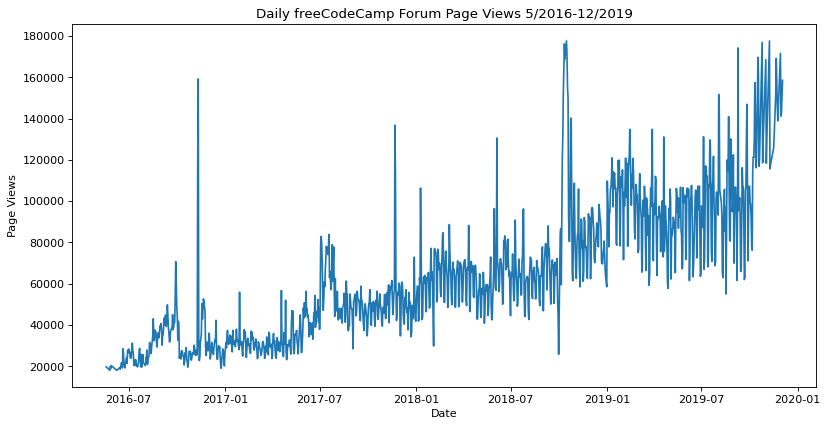

In [7]:
figure(figsize=(12, 6), dpi=80)

plt.plot(df)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019',loc='center')
plt.xlabel('Date')
plt.ylabel('Page Views')

plt.draw()

* Draw a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".


In [5]:
df_bar = df.copy().reset_index()
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%B') for d in df_bar.date]
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_bar.head(3)

,year,month,value
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571


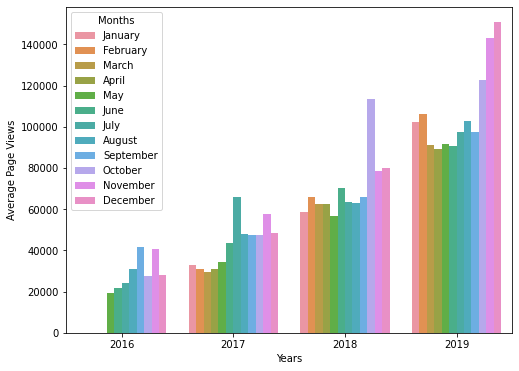

In [6]:
fig, ax = plt.subplots(1, figsize=(8, 6))
sns.barplot(data=df_bar, x='year', y='value', hue='month', hue_order=month_order)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(loc='upper left', title='Months')

plt.show()

* Use Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.


In [43]:
df_box = df.copy().reset_index()
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.drop(['date'], axis = 1, inplace = True)

sorted_months = sorted(list(set(df_box.month)))

df_box

,value,year,month
0,19736,2016,May
1,18060,2016,May
2,19997,2016,May
3,19044,2016,May
4,20325,2016,May
...,...,...,...
1234,138875,2019,Nov
1235,171584,2019,Nov
1236,141161,2019,Nov
1237,142918,2019,Dec


[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views')]

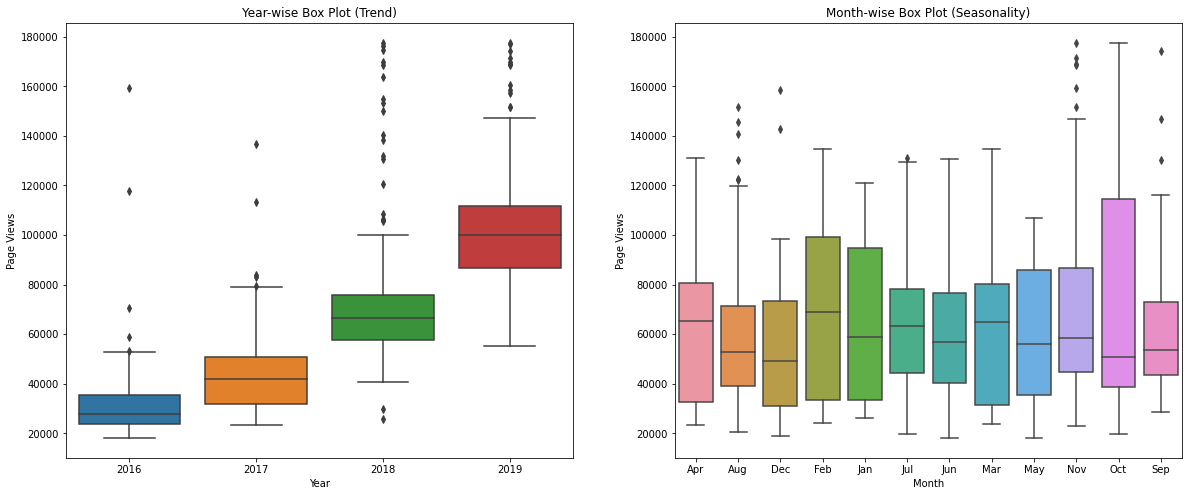

In [44]:
f, axes = plt.subplots(1, 2,figsize=(20,8))
sns.boxplot(y="value", x= "year", data=df_box,  orient='v' , ax=axes[0])
sns.boxplot(y="value", x= "month", data=df_box,  orient='v' , ax=axes[1], 
            order = sorted_months)

axes[0].set(title="Year-wise Box Plot (Trend)",xlabel='Year',ylabel="Page Views")
axes[1].set(title="Month-wise Box Plot (Seasonality)",xlabel='Month',ylabel="Page Views")
